In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
atr=pd.read_csv("G:\data analytics\datasets\R Project - Attrition\Attrition.csv")

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
atr.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [5]:
##removing columns having 1 unique value
atr=atr.drop(['StandardHours','EmployeeCount','EmployeeNumber','Over18'],axis=1)

In [6]:
##converting some numerical variables into categorical variables for visualisation(EDA)
for col in ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','JobLevel']:
    atr[col]=atr[col].astype('object')

atr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null object
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null object
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null object
JobLevel                    1470 non-null object
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null object
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorke

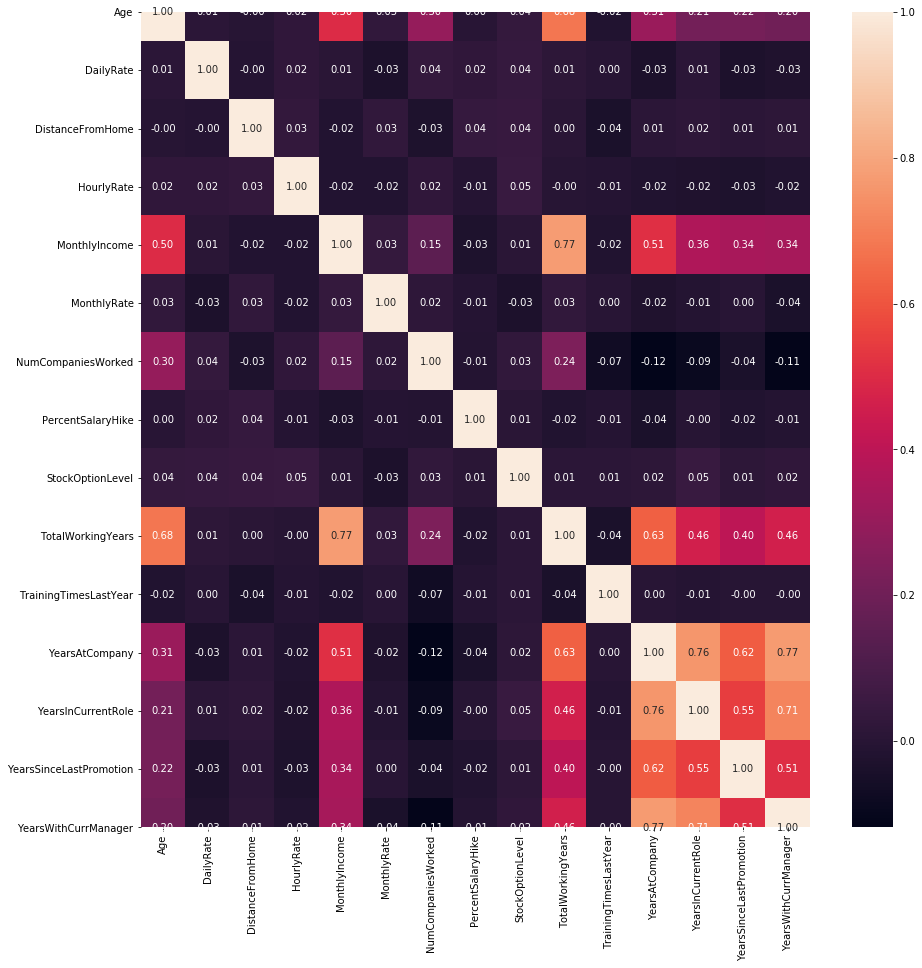

In [7]:
##checking multi-collinearity
plt.figure(figsize=(15,15))
sns.heatmap(atr.corr(),annot=True,fmt='.2f')

##since all the values are less than 0.8(assume threshold) we can assume that there is no multi-collinearity

In [8]:
##taking only categorical columns for EDA
feat_cat=atr.select_dtypes(include='object')
##taking only numerical columns for EDA
feat_num=atr.select_dtypes(include='number')

In [9]:
atr.groupby('WorkLifeBalance').Attrition.value_counts(sum)

WorkLifeBalance  Attrition
1                No           0.687500
                 Yes          0.312500
2                No           0.831395
                 Yes          0.168605
3                No           0.857783
                 Yes          0.142217
4                No           0.823529
                 Yes          0.176471
Name: Attrition, dtype: float64

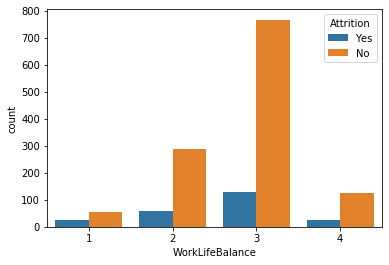

In [10]:
sns.countplot(atr.WorkLifeBalance,hue=atr.Attrition)
##As the worklife balance rating decreases the percentage of attrition increases

In [11]:
atr.groupby('RelationshipSatisfaction').Attrition.value_counts(sum)

RelationshipSatisfaction  Attrition
1                         No           0.793478
                          Yes          0.206522
2                         No           0.851485
                          Yes          0.148515
3                         No           0.845316
                          Yes          0.154684
4                         No           0.851852
                          Yes          0.148148
Name: Attrition, dtype: float64

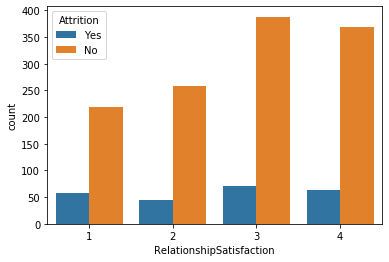

In [12]:
sns.countplot(atr.RelationshipSatisfaction,hue=atr.Attrition)
##as the satisfaction level decreases the percentage of attrition decreases 

In [13]:
atr.groupby('OverTime').Attrition.value_counts(sum)

OverTime  Attrition
No        No           0.895636
          Yes          0.104364
Yes       No           0.694712
          Yes          0.305288
Name: Attrition, dtype: float64

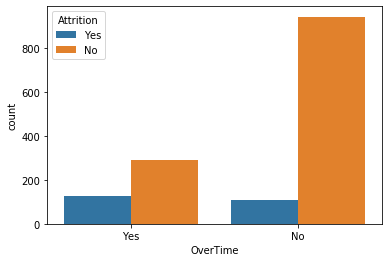

In [14]:
sns.countplot(atr.OverTime,hue=atr.Attrition)
##people working overtime have high percentage of leaving the organization

In [15]:
atr.groupby('JobSatisfaction').Attrition.value_counts(sum)

JobSatisfaction  Attrition
1                No           0.771626
                 Yes          0.228374
2                No           0.835714
                 Yes          0.164286
3                No           0.834842
                 Yes          0.165158
4                No           0.886710
                 Yes          0.113290
Name: Attrition, dtype: float64

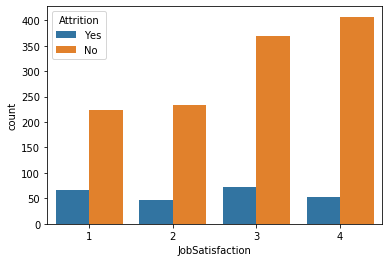

In [16]:
sns.countplot(atr.JobSatisfaction,hue=atr.Attrition)
####As the jobsatisfaction increase,the percentage of Attrition decreaces

In [17]:
atr.groupby('JobInvolvement').Attrition.value_counts(sum)

JobInvolvement  Attrition
1               No           0.662651
                Yes          0.337349
2               No           0.810667
                Yes          0.189333
3               No           0.855991
                Yes          0.144009
4               No           0.909722
                Yes          0.090278
Name: Attrition, dtype: float64

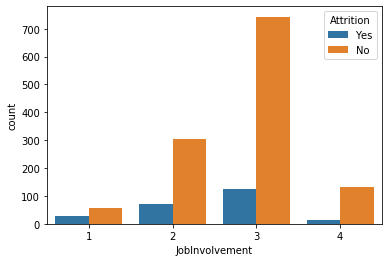

In [18]:
sns.countplot(atr.JobInvolvement,hue=atr.Attrition)
##As the JobInvolvement increases, the percentage of Attrition decreases

In [19]:
atr.groupby('EnvironmentSatisfaction').Attrition.value_counts(sum)

EnvironmentSatisfaction  Attrition
1                        No           0.746479
                         Yes          0.253521
2                        No           0.850174
                         Yes          0.149826
3                        No           0.863135
                         Yes          0.136865
4                        No           0.865471
                         Yes          0.134529
Name: Attrition, dtype: float64

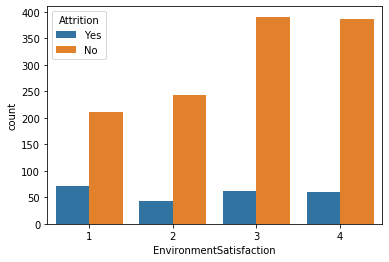

In [20]:
sns.countplot(atr.EnvironmentSatisfaction,hue=atr.Attrition)
##As the environmenatal satisfaction increases, the percentage of Attrition decreases

In [21]:
atr.groupby('Attrition').MaritalStatus.value_counts(sum)

Attrition  MaritalStatus
No         Married          0.477697
           Single           0.283861
           Divorced         0.238443
Yes        Single           0.506329
           Married          0.354430
           Divorced         0.139241
Name: MaritalStatus, dtype: float64

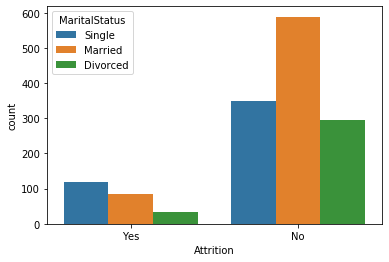

In [22]:
sns.countplot(atr.Attrition,hue=atr.MaritalStatus)
#from the chart it can be observed that single people(50% of Attritions) are more likely to leave the job and
#married people are more likely to stay

In [23]:
atr.groupby('Attrition').Gender.value_counts(sum)

Attrition  Gender
No         Male      0.593674
           Female    0.406326
Yes        Male      0.632911
           Female    0.367089
Name: Gender, dtype: float64

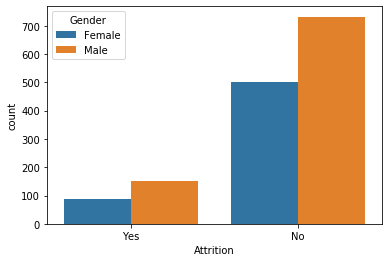

In [24]:
sns.countplot(atr.Attrition,hue=atr.Gender)

# it can be observe that in every satisfaction type column, as the satisfaction level decreases the percentage of Attrition increases thus we can create a new column by adding the satisfaction level i.e. create a new feature combining all satisfaction columns

In [25]:
satisfaction=atr.EnvironmentSatisfaction+atr.JobInvolvement+atr.JobSatisfaction+atr.RelationshipSatisfaction
satisfaction.mean()

10.892517006802722

In [26]:
##taking mean of satisfaction values, making all values between 1.0 to 4   
satisfaction=satisfaction/4
np.unique(satisfaction)

array([1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0],
      dtype=object)

In [27]:
##conbining the two data
atr=pd.concat([atr,satisfaction],axis=1)

In [28]:
atr=atr.rename(columns={0:'OverallSatisfaction'})

In [29]:
atr.groupby('OverallSatisfaction').Attrition.value_counts(sum)

OverallSatisfaction  Attrition
1.25                 Yes          0.555556
                     No           0.444444
1.50                 Yes          0.550000
                     No           0.450000
1.75                 No           0.675000
                     Yes          0.325000
2.00                 No           0.710280
                     Yes          0.289720
2.25                 No           0.796610
                     Yes          0.203390
2.50                 No           0.842697
                     Yes          0.157303
2.75                 No           0.882129
                     Yes          0.117871
3.00                 No           0.867925
                     Yes          0.132075
3.25                 No           0.902299
                     Yes          0.097701
3.50                 No           0.872727
                     Yes          0.127273
3.75                 No           0.942857
                     Yes          0.057143
4.00                 No

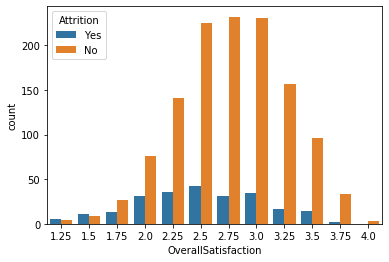

In [30]:
sns.countplot(atr.OverallSatisfaction,hue=atr.Attrition)

In [31]:
##converting columns into numerical  variables back again
for col in ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','JobLevel']:
    atr[col]=atr[col].astype('int64')

atr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked    

In [32]:
atr.OverallSatisfaction=atr.OverallSatisfaction.astype('int64')
atr.OverallSatisfaction.describe()

count    1470.000000
mean        2.354422
std         0.571829
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: OverallSatisfaction, dtype: float64

In [33]:
atr=atr.drop(['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction'],axis=1)
atr.shape

(1470, 28)

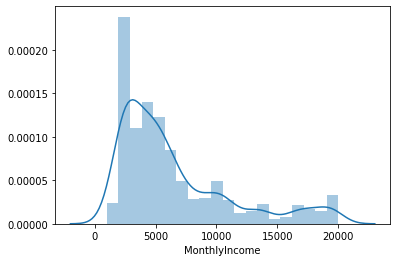

In [41]:
sns.distplot(atr.MonthlyIncome)

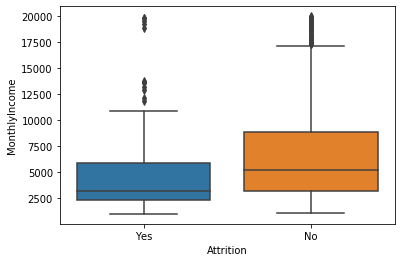

In [38]:
sns.boxplot(y=atr.MonthlyIncome,x=atr.Attrition)

In [39]:
##since we have to analyze why the employess leave the organization, we will remove outliers related to only Yes values of Attrition
def remove_outliers(df,col):
    q1=np.quantile(df[col],0.25)
    q3=np.quantile(df[col],0.75)
    iqr=(q3-q1)
    global df1
    global final_list
    global final_list1
    final_list=[x for x in df[col] if (x<(1.5*iqr+q3))]
    df1=df.loc[df[col].isin(final_list)];
    print('iqr is',iqr)
    print(df1.shape)

In [40]:
remove_outliers(atr[atr.Attrition=='Yes'],'MonthlyIncome')

iqr is 3543.0
(225, 28)


In [42]:
atr_no=atr[atr.Attrition=='No']
atr_no.shape

(1233, 28)

In [44]:
atr=pd.concat([atr_no,df1],axis=0)
atr.shape

(1458, 28)

In [45]:
atr_cat=atr.select_dtypes('object')
atr_cat=atr_cat.drop(['Attrition'],axis=1)

In [46]:
##converting categorical features into numerical features for model building
atr=pd.get_dummies(atr,columns=atr_cat.columns,drop_first=True)
atr.shape

(1458, 42)

In [47]:
X=atr.drop(['Attrition'],axis=1)
Y=atr.Attrition

In [48]:
Y.replace({'Yes':1,'No':0},inplace=True)

In [49]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smt=SMOTE()

Using TensorFlow backend.


In [50]:
X.shape

(1458, 41)

In [51]:
Y.shape

(1458,)

In [52]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=101)
xtrain,ytrain=smt.fit_sample(x_train,y_train)

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(min_samples_split=200)

In [55]:
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
confusion_matrix(dtree.predict(x_test),y_test)

array([[185,  24],
       [ 65,  18]], dtype=int64)

In [57]:
print(classification_report(dtree.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       209
           1       0.43      0.22      0.29        83

    accuracy                           0.70       292
   macro avg       0.58      0.55      0.55       292
weighted avg       0.65      0.70      0.66       292



In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500)

In [59]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
confusion_matrix(rfc.predict(x_test),y_test)

array([[228,  28],
       [ 22,  14]], dtype=int64)

In [61]:
print(classification_report(rfc.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       256
           1       0.33      0.39      0.36        36

    accuracy                           0.83       292
   macro avg       0.62      0.64      0.63       292
weighted avg       0.84      0.83      0.83       292



In [62]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(dtree,n_estimators=500)

In [63]:
abc.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=200,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                     

In [64]:
confusion_matrix(abc.predict(x_test),y_test)

array([[233,  29],
       [ 17,  13]], dtype=int64)

In [65]:
print(classification_report(abc.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       262
           1       0.31      0.43      0.36        30

    accuracy                           0.84       292
   macro avg       0.62      0.66      0.64       292
weighted avg       0.87      0.84      0.85       292



In [66]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

In [67]:
logmodel.fit(xtrain,ytrain)

C:\Users\win\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
print(classification_report(logmodel.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.61      0.89      0.72       170
           1       0.57      0.20      0.29       122

    accuracy                           0.60       292
   macro avg       0.59      0.55      0.51       292
weighted avg       0.59      0.60      0.54       292



In [69]:
from sklearn.naive_bayes import MultinomialNB
nbay=MultinomialNB()

In [70]:
nbay.fit(xtrain,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [71]:
print(classification_report(nbay.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.53      0.89      0.66       148
           1       0.62      0.18      0.28       144

    accuracy                           0.54       292
   macro avg       0.57      0.54      0.47       292
weighted avg       0.57      0.54      0.47       292



In [72]:
from sklearn.svm import SVC
svcmodel=SVC()

In [73]:
svcmodel.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
print(classification_report(svcmodel.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.51      0.93      0.66       138
           1       0.76      0.21      0.33       154

    accuracy                           0.55       292
   macro avg       0.64      0.57      0.49       292
weighted avg       0.64      0.55      0.48       292



In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [76]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [77]:
print(classification_report(knn.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       192
           1       0.50      0.21      0.30       100

    accuracy                           0.66       292
   macro avg       0.59      0.55      0.53       292
weighted avg       0.62      0.66      0.61       292



In [78]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Creating data frame for models score and selecting best model

In [79]:
models=['dtree','rfc','abc','logmodel','nbay','knn','svm']
accuracy=[accuracy_score(dtree.predict(x_test),y_test),accuracy_score(rfc.predict(x_test),y_test),accuracy_score(abc.predict(x_test),y_test),accuracy_score(logmodel.predict(x_test),y_test),accuracy_score(nbay.predict(x_test),y_test),accuracy_score(knn.predict(x_test),y_test),accuracy_score(svcmodel.predict(x_test),y_test)]
f1_score=[f1_score(dtree.predict(x_test),y_test),f1_score(rfc.predict(x_test),y_test),f1_score(abc.predict(x_test),y_test),f1_score(logmodel.predict(x_test),y_test),f1_score(nbay.predict(x_test),y_test),f1_score(knn.predict(x_test),y_test),f1_score(svcmodel.predict(x_test),y_test)]

df_model=pd.DataFrame({'Models':models,"Accuracy":accuracy,'f1_score':f1_score})

In [80]:
df_model

,Models,Accuracy,f1_score
0,dtree,0.695205,0.288000
1,rfc,0.828767,0.358974
2,abc,0.842466,0.361111
3,logmodel,0.602740,0.292683
4,nbay,0.541096,0.279570
5,knn,0.657534,0.295775
6,svm,0.547945,0.326531


In [81]:
##creating Data Frame for feature importance using rfc
df_rf=pd.DataFrame({"Columns":X.columns,"Importance":rfc.feature_importances_})

In [82]:
df_rf.sort_values("Importance",ascending=False)

,Columns,Importance
6,MonthlyIncome,0.077643
19,OverallSatisfaction,0.071088
11,StockOptionLevel,0.060073
5,JobLevel,0.057758
12,TotalWorkingYears,0.042140
15,YearsAtCompany,0.040049
0,Age,0.039228
7,MonthlyRate,0.038380
16,YearsInCurrentRole,0.036555
1,DailyRate,0.035659


In [83]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [84]:
test=SelectKBest(score_func=chi2,k=15)

In [88]:
fitted_atr=test.fit(xtrain,ytrain)

In [89]:
df_chi=pd.DataFrame({'columns':xtrain.columns,'scores':fitted_atr.scores_})

In [90]:
df_chi.sort_values('scores',ascending=False)

,columns,scores
6,MonthlyIncome,690180.690091
1,DailyRate,4518.708660
12,TotalWorkingYears,1305.083108
15,YearsAtCompany,971.974805
7,MonthlyRate,727.950861
16,YearsInCurrentRole,654.634584
18,YearsWithCurrManager,552.675643
0,Age,358.972162
11,StockOptionLevel,240.434326
17,YearsSinceLastPromotion,196.242264


In [148]:
x_new=fitted_atr.transform(X)

In [149]:
x_new=pd.DataFrame(x_new)

In [150]:
x_newtrain,x_newtest,y_newtrain,y_newtest=train_test_split(X,Y,test_size=0.2,random_state=101)

In [151]:
xnewtrain,ynewtrain=smt.fit_sample(x_newtrain,y_newtrain)

In [152]:
x_newtest.shape

(292, 41)

In [153]:
y_newtest.shape

(292,)

In [160]:
rfc.fit(xnewtrain,ynewtrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [161]:
confusion_matrix(rfc.predict(x_newtest),y_newtest)

array([[227,  28],
       [ 23,  14]], dtype=int64)

In [162]:
print(classification_report(rfc.predict(x_newtest),y_newtest))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       255
           1       0.33      0.38      0.35        37

    accuracy                           0.83       292
   macro avg       0.62      0.63      0.63       292
weighted avg       0.84      0.83      0.83       292



In [120]:
from sklearn.feature_selection import RFE
rfe_rfc=RFE(rfc,15)

In [124]:
rfe_rfc.fit(xtrain,ytrain)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=500, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [125]:
df_rfe=pd.DataFrame({"Colums":X.columns,"Importance":rfe_rfc.support_})

In [123]:
df_rfe.sort_values('Importance',ascending=False)

,Colums,Importance
0,Age,True
9,PercentSalaryHike,True
1,DailyRate,True
19,OverallSatisfaction,True
18,YearsWithCurrManager,True
15,YearsAtCompany,True
13,TrainingTimesLastYear,True
12,TotalWorkingYears,True
11,StockOptionLevel,True
40,OverTime_Yes,True


In [137]:
x_new1=rfe_rfc.transform(X)

In [138]:
x_new1=pd.DataFrame(x_new1)

In [139]:
x_newtrain1,x_newtest1,y_newtrain1,y_newtest1=train_test_split(X,Y,test_size=0.2,random_state=101)

In [140]:
xnewtrain1,ynewtrain1=smt.fit_sample(x_newtrain1,y_newtrain1)

In [141]:
x_newtest1.shape

(292, 41)

In [142]:
y_newtest1.shape

(292,)

In [144]:
ynewtrain1.value_counts()

1    983
0    983
Name: Attrition, dtype: int64

In [145]:
rfc.fit(xnewtrain1,ynewtrain1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [146]:
confusion_matrix(rfc.predict(x_newtest1),y_newtest1)

array([[232,  27],
       [ 18,  15]], dtype=int64)

In [147]:
print(classification_report(rfc.predict(x_newtest1),y_newtest1))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       259
           1       0.36      0.45      0.40        33

    accuracy                           0.85       292
   macro avg       0.64      0.68      0.66       292
weighted avg       0.86      0.85      0.85       292



In [163]:
from boruta import BorutaPy

In [164]:
bo_x=np.array(xtrain)
bo_y=np.array(ytrain)

In [165]:
boruta_feature=BorutaPy(rfc,random_state=101,max_iter=30,perc=100,verbose=2)

In [166]:
boruta_feature.fit(bo_x,bo_y)

Iteration: 	1 / 30
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	2 / 30
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	3 / 30
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	4 / 30
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	5 / 30
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	6 / 30
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	7 / 30
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	8 / 30
Confirmed: 	20
Tentative: 	0
Rejected: 	21


BorutaPy finished running.

Iteration: 	9 / 30
Confirmed: 	20
Tentative: 	0
Rejected: 	21


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=None, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=1000, n_jobs=None,
                                          oob_score=False,
                                          random_state=<mtrand.RandomState object at 0x000000C8EA92F3B8>,
                                          verbose=0, warm_start=False),
         max_iter=30, n

In [167]:
df_bor=pd.DataFrame({"columns":xtrain.columns,"Importance":boruta_feature.support_})

In [168]:
df_bor.sort_values('Importance',ascending=False)

,columns,Importance
0,Age,True
12,TotalWorkingYears,True
26,EducationField_Medical,True
24,EducationField_Life Sciences,True
22,Department_Research & Development,True
21,BusinessTravel_Travel_Rarely,True
1,DailyRate,True
19,OverallSatisfaction,True
18,YearsWithCurrManager,True
16,YearsInCurrentRole,True
